In [47]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

# Question 1

We first investigate the correlation between trees using bootstrap samples or not.

In [79]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              BaggingClassifier, GradientBoostingRegressor)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits(n_class=2, return_X_y=False)
X_digits = digits.data
y_digits = digits.target

#Split the data in train and test samples
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, train_size=0.5, random_state=4)

#Nuber of estimators to be used
n_est = 10

model1 = RandomForestClassifier(n_estimators=n_est, max_features=None, bootstrap=False)
model2 = RandomForestClassifier(n_estimators=n_est, max_features=None, bootstrap=True)


n1 = 0
correl1 = 0
clf1 = model1.fit(X_train, y_train) 
scores1 = clf1.score(X_test, y_test) 
corr1 = np.zeros((n_est, n_est))
for i in range(n_est):
    for j in range(n_est):
        rgra = model1.estimators_[i]
        rgrb = model1.estimators_[j]
        corr1[i,j] = np.corrcoef(rgra.predict_proba(X_test)[:,0], rgrb.predict_proba(X_test)[:,0])[0, 1]
        if (i<j):
            n1 += 1
            correl1 += corr1[i,j]
print ("The average correlation for the model without bootstrap samples is: ")
print (correl1/n1)

n2 = 0
correl2 = 0
clf2 = model2.fit(X_train, y_train)
scores2 = clf2.score(X_test, y_test)    
corr2 = np.zeros((n_est, n_est))
for i in range(n_est):
    for j in range(n_est):
        rgr1 = model2.estimators_[i]
        rgr2 = model2.estimators_[j]
        corr2[i,j] = np.corrcoef(rgr1.predict_proba(X_test)[:,0], rgr2.predict_proba(X_test)[:,0])[0, 1]
        if (i<j):
            n2 += 1
            correl2 += corr[i,j]
print ("The average correlation for the model with bootstrap samples is: ")
print (correl2/n2)


#plt.imshow(corr, interpolation='none')

The average correlation for the model without bootstrap samples is: 
1.0
The average correlation for the model with bootstrap samples is: 
0.916979038345


The correlation between trees is 1 when the bootsrap samples are not used, and it is lower when it is used. This is expected because in the case that has been tried here, all the features are used for the classification and all the samples are the same. The trees are hence 100% correlated.

We now investigate the influence of selecting k variables out of the n available feautures.

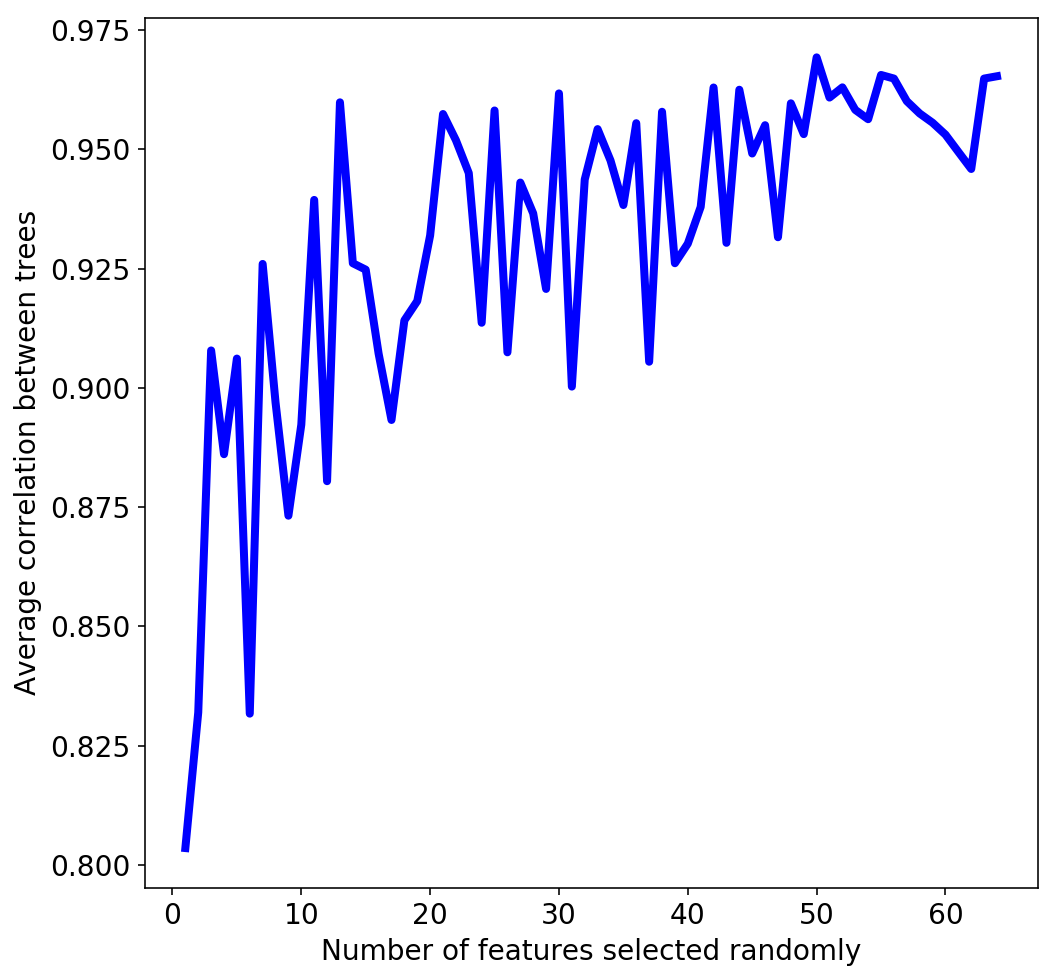

In [80]:
correlations = []
ks = range(1,65)

for a in ks:
    n = 0
    correl = 0
    model = RandomForestClassifier(n_estimators=n_est, max_features=a, bootstrap=True)
    clf = model.fit(X_train, y_train) 
    scores = clf.score(X_test, y_test) 
    corr = np.zeros((n_est, n_est))
    for i in range(n_est):
        for j in range(n_est):
            rgr1 = model.estimators_[i]
            rgr2 = model.estimators_[j]
            corr[i,j] = np.corrcoef(rgr1.predict_proba(X_test)[:,0], rgr2.predict_proba(X_test)[:,0])[0, 1]
            if (i<j):
                n += 1
                correl += corr[i,j]
    #print ("The average correlation for the model selecting "+str(a)+" features at random is: ")
    #print (correl/n)
    correlations.append(correl/n)

plt.plot(ks, correlations, '-b', lw=4)
#plt.legend(loc='best')
plt.xlabel("Number of features selected randomly")
plt.ylabel("Average correlation between trees")

The lower the number of features selected randomly, the higher the level of randomisation and hence the lower the correlation between trees.

We finally investigate the effect on the correlation between trees obtained by picking randomly the best split point.

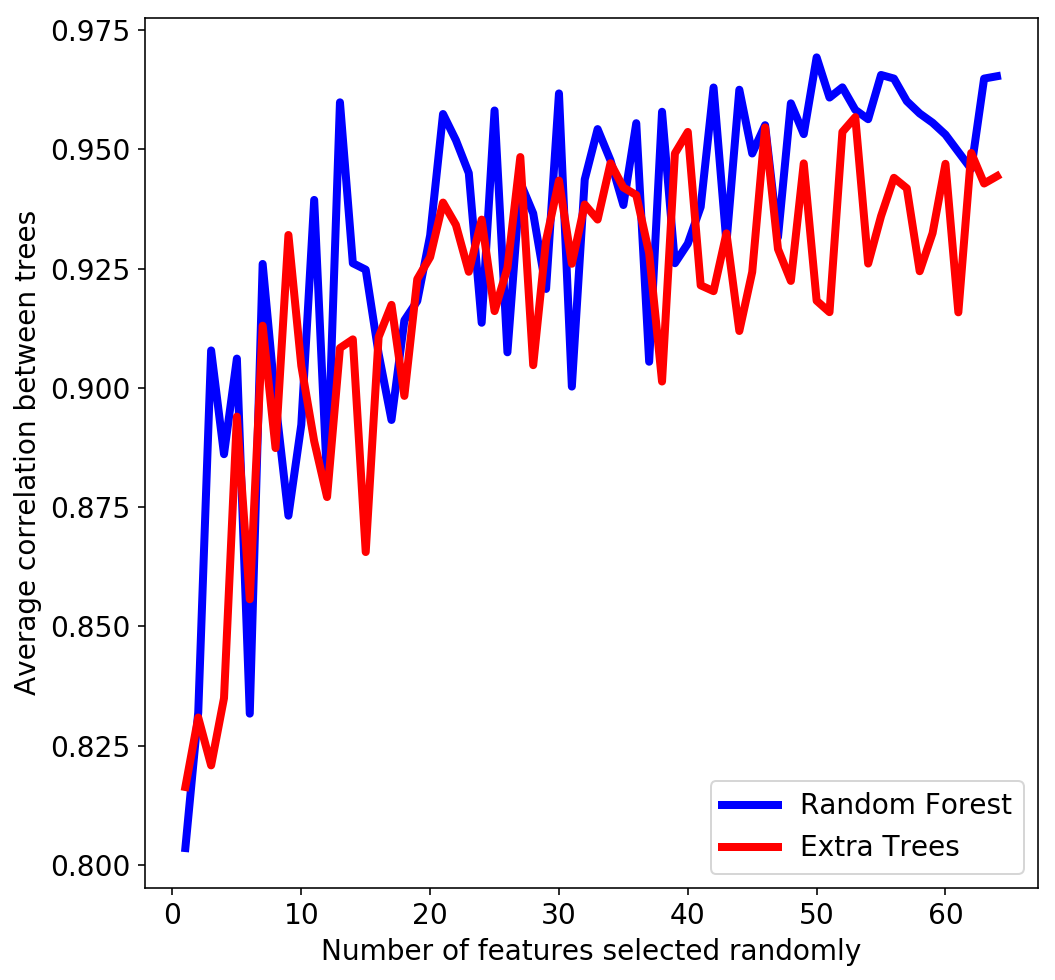

In [81]:
correlationsET = []
ks = range(1,65)
    
for a in ks:
    n = 0
    correl = 0
    model = ExtraTreesClassifier(n_estimators=n_est, max_features=a, bootstrap=True)
    clf = model.fit(X_train, y_train) 
    scores = clf.score(X_test, y_test) 
    corr = np.zeros((n_est, n_est))
    for i in range(n_est):
        for j in range(n_est):
            rgr1 = model.estimators_[i]
            rgr2 = model.estimators_[j]
            corr[i,j] = np.corrcoef(rgr1.predict_proba(X_test)[:,0], rgr2.predict_proba(X_test)[:,0])[0, 1]
            if (i<j):
                n += 1
                correl += corr[i,j]
    #print ("The average correlation for the model selecting "+str(a)+" features at random is: ")
    #print (correl/n)
    correlationsET.append(correl/n)

plt.plot(ks, correlations, '-b', label='Random Forest', lw=4)
plt.plot(ks, correlationsET, '-r', label='Extra Trees', lw=4)
plt.legend(loc='best')
plt.xlabel("Number of features selected randomly")
plt.ylabel("Average correlation between trees")

Here, the ExtraTreesClassifier takes the best split point at random whereas the RandomForestClassifier choses it by minimizing the impurity. From the graph, the correlation is lower when chosing the split point randomly.

# Question 2

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10,30,50,70,100,200,300]}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)


etc = ExtraTreesClassifier()

grid_search = GridSearchCV(etc, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)

gbt = GradientBoostingRegressor()

grid_search = GridSearchCV(etc, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)

{'n_estimators': 70}
{'n_estimators': 10}
{'n_estimators': 30}


In [105]:
index = np.arange(64)
bar_width = 0.25

clf = RandomForestClassifier(n_estimators = 70)

clf.fit(X_train,y_train)
print (clf.score(X_test,y_test))
feature_importance_clf = clf.feature_importances_


etc = ExtraTreesClassifier(n_estimators = 10)

etc.fit(X_train,y_train)
print (etc.score(X_test,y_test))
feature_importance_etc = etc.feature_importances_

gbt = GradientBoostingRegressor(n_estimators = 30)

gbt.fit(X_train,y_train)
print (gbt.score(X_test,y_test))
feature_importance_gbt = gbt.feature_importances_


0.994444444444
1.0
0.912865556301


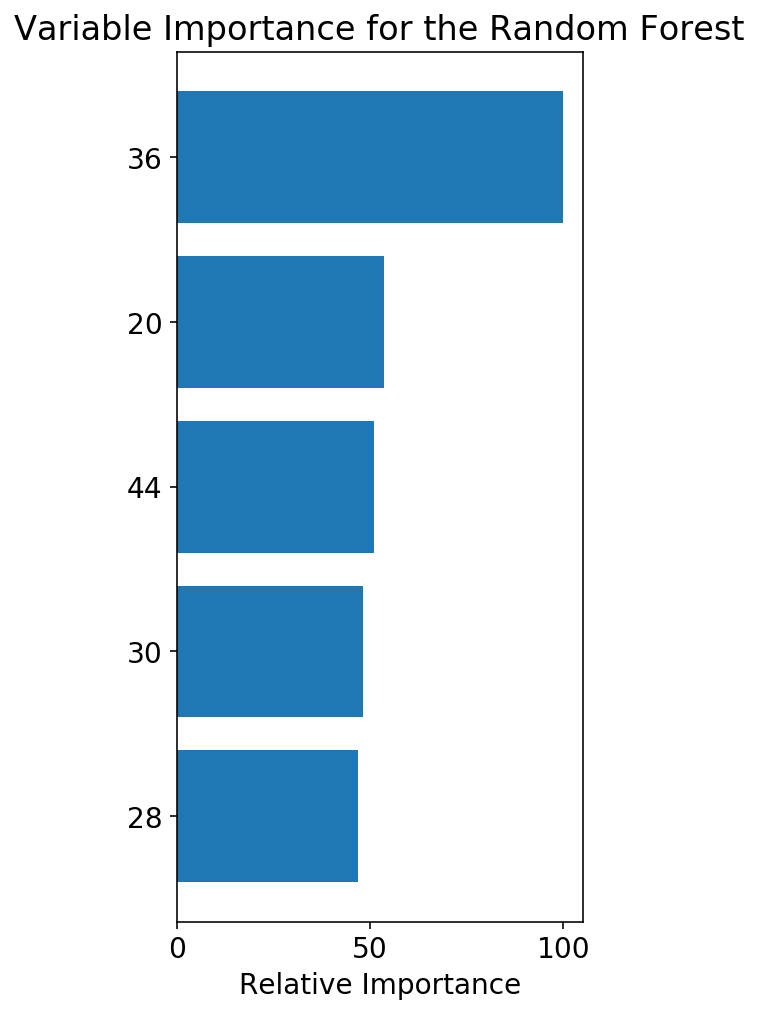

In [106]:
feature_importance_clf = 100.0 * (feature_importance_clf / feature_importance_clf.max())
sorted_idx = np.argsort(feature_importance_clf)[59:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_clf[sorted_idx], align='center')
plt.yticks(pos, sorted_idx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the Random Forest')
plt.show()

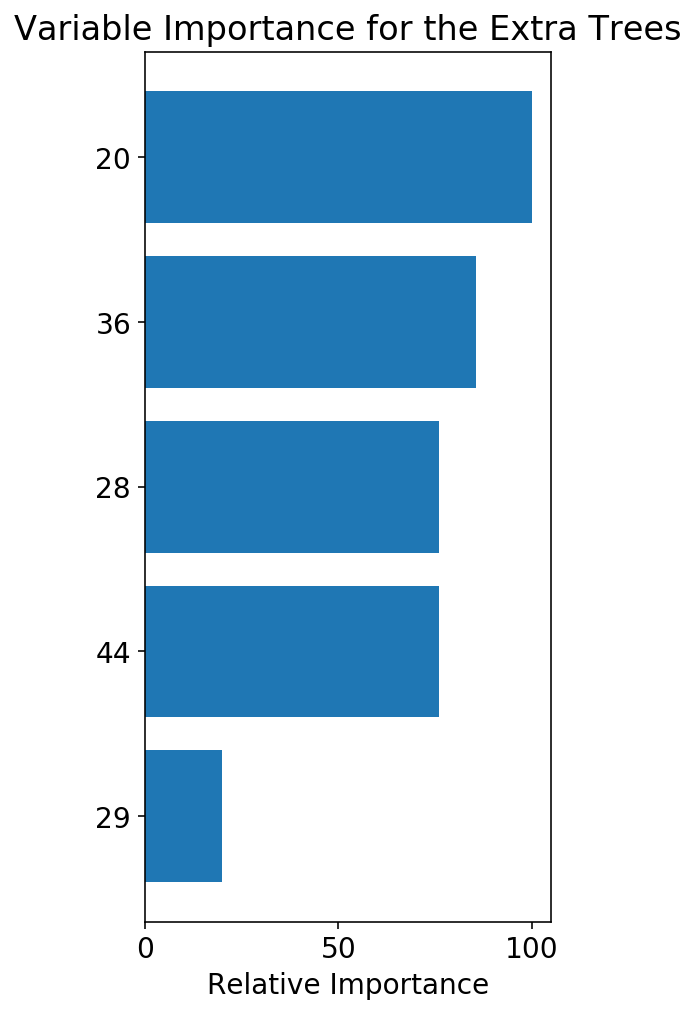

In [109]:
feature_importance_etc = 100.0 * (feature_importance_etc / feature_importance_etc.max())
sorted_idx = np.argsort(feature_importance_etc)[59:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_etc[sorted_idx], align='center')
plt.yticks(pos, sorted_idx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the Extra Trees')
plt.show()

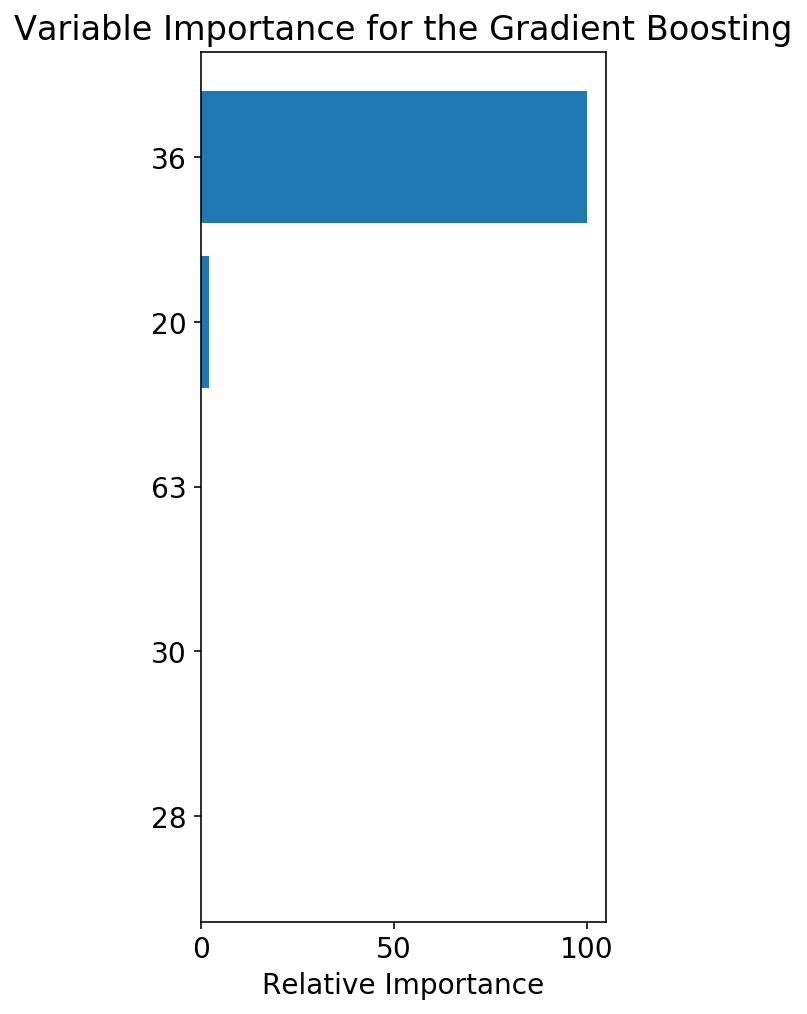

In [110]:
feature_importance_gbt = 100.0 * (feature_importance_gbt / feature_importance_gbt.max())
sorted_idx = np.argsort(feature_importance_gbt)[59:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_gbt[sorted_idx], align='center')
plt.yticks(pos, sorted_idx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the Gradient Boosting')
plt.show()

The Random Forest and the Extra Trees classifiers seem to give very similar results in which several pixels are important to make the difference between a 0 and a 1 (all the central pixels, that are white for a 0 and black for a one). The Tree Boosting Regressor gives all the importance to only one of the central pixels. Intuitively, we would make the difference between a 0 and a 1 on several pixel (in more agreement with the random forest and extra trees classifiers).

Now we repeat the same thing but with the nine digits.

In [111]:
digits = load_digits(return_X_y=False)
X_digits = digits.data
y_digits = digits.target

#Split the data in train and test samples
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, train_size=0.5, random_state=4)


In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10,30,50,70,100,200,300,1000]}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)


etc = ExtraTreesClassifier()

grid_search = GridSearchCV(etc, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)

gbt = GradientBoostingRegressor()

grid_search = GridSearchCV(etc, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)

{'n_estimators': 1000}
{'n_estimators': 1000}
{'n_estimators': 200}


In [115]:
index = np.arange(64)
bar_width = 0.25

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X_train,y_train)
print (clf.score(X_test,y_test))
feature_importance_clf = clf.feature_importances_


etc = ExtraTreesClassifier(n_estimators = 1000)

etc.fit(X_train,y_train)
print (etc.score(X_test,y_test))
feature_importance_etc = etc.feature_importances_

gbt = GradientBoostingRegressor(n_estimators = 200)

gbt.fit(X_train,y_train)
print (gbt.score(X_test,y_test))
feature_importance_gbt = gbt.feature_importances_

0.979977753059
0.983314794216
0.837753273515


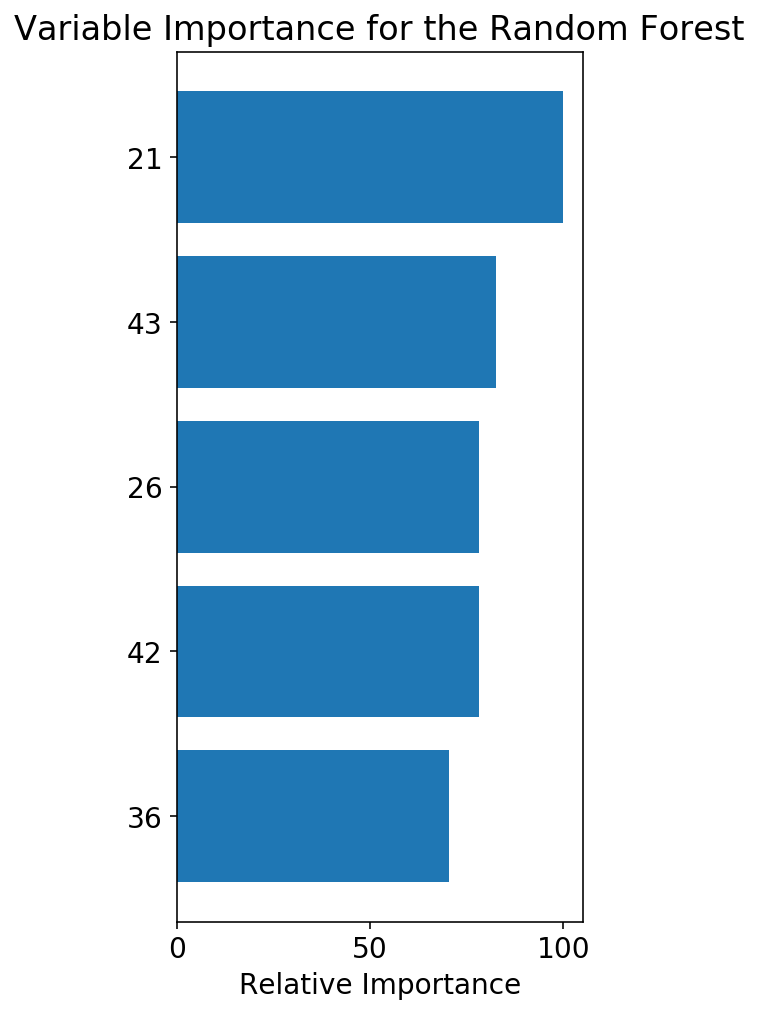

In [116]:
feature_importance_clf = 100.0 * (feature_importance_clf / feature_importance_clf.max())
sorted_idx = np.argsort(feature_importance_clf)[59:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_clf[sorted_idx], align='center')
plt.yticks(pos, sorted_idx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the Random Forest')
plt.show()

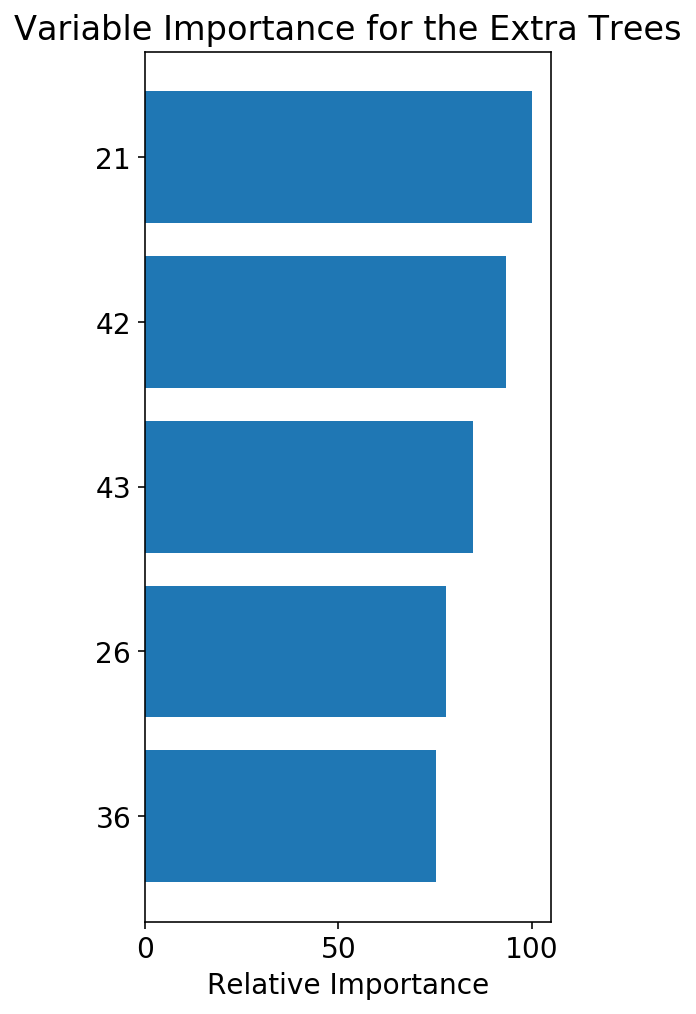

In [117]:
feature_importance_etc = 100.0 * (feature_importance_etc / feature_importance_etc.max())
sorted_idx = np.argsort(feature_importance_etc)[59:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_etc[sorted_idx], align='center')
plt.yticks(pos, sorted_idx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the Extra Trees')
plt.show()

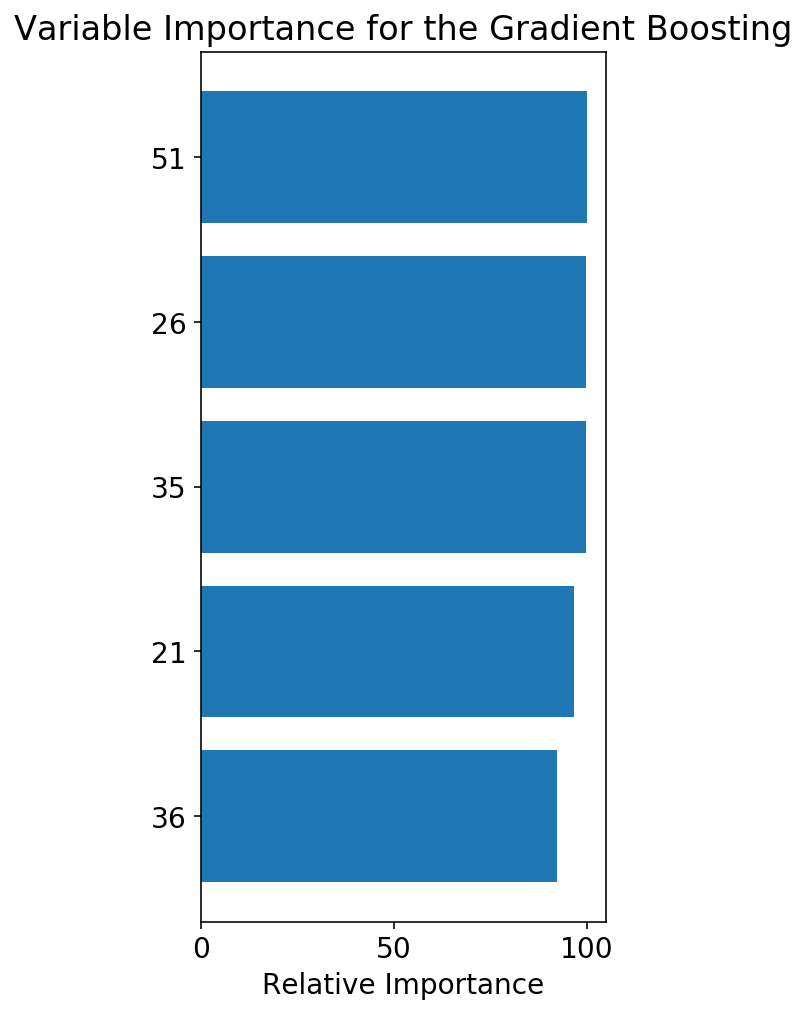

In [118]:
feature_importance_gbt = 100.0 * (feature_importance_gbt / feature_importance_gbt.max())
sorted_idx = np.argsort(feature_importance_gbt)[59:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_gbt[sorted_idx], align='center')
plt.yticks(pos, sorted_idx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance for the Gradient Boosting')
plt.show()

Once more, the most discriminating part of the image seems to be the central part, but this time the Gradient Boosting Regressor finds as well several useful pixels in the central part of the image.

# Question 3

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

def make_data(n_samples=800, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=4)

In [129]:
param_grid = {'learning_rate':[0.5, 0.1, 0.05],
             'max_depth':[1,2,4,6]}
gbt = GradientBoostingRegressor(n_estimators=1000)
grid_search = GridSearchCV(gbt, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 2}


In [130]:
param_grid = {'n_estimators':[10,30,50,70,100,200,300, 1000]}
gbt = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 2)
grid_search = GridSearchCV(gbt, param_grid).fit(X_train,y_train)
print (grid_search.best_params_)

{'n_estimators': 1000}


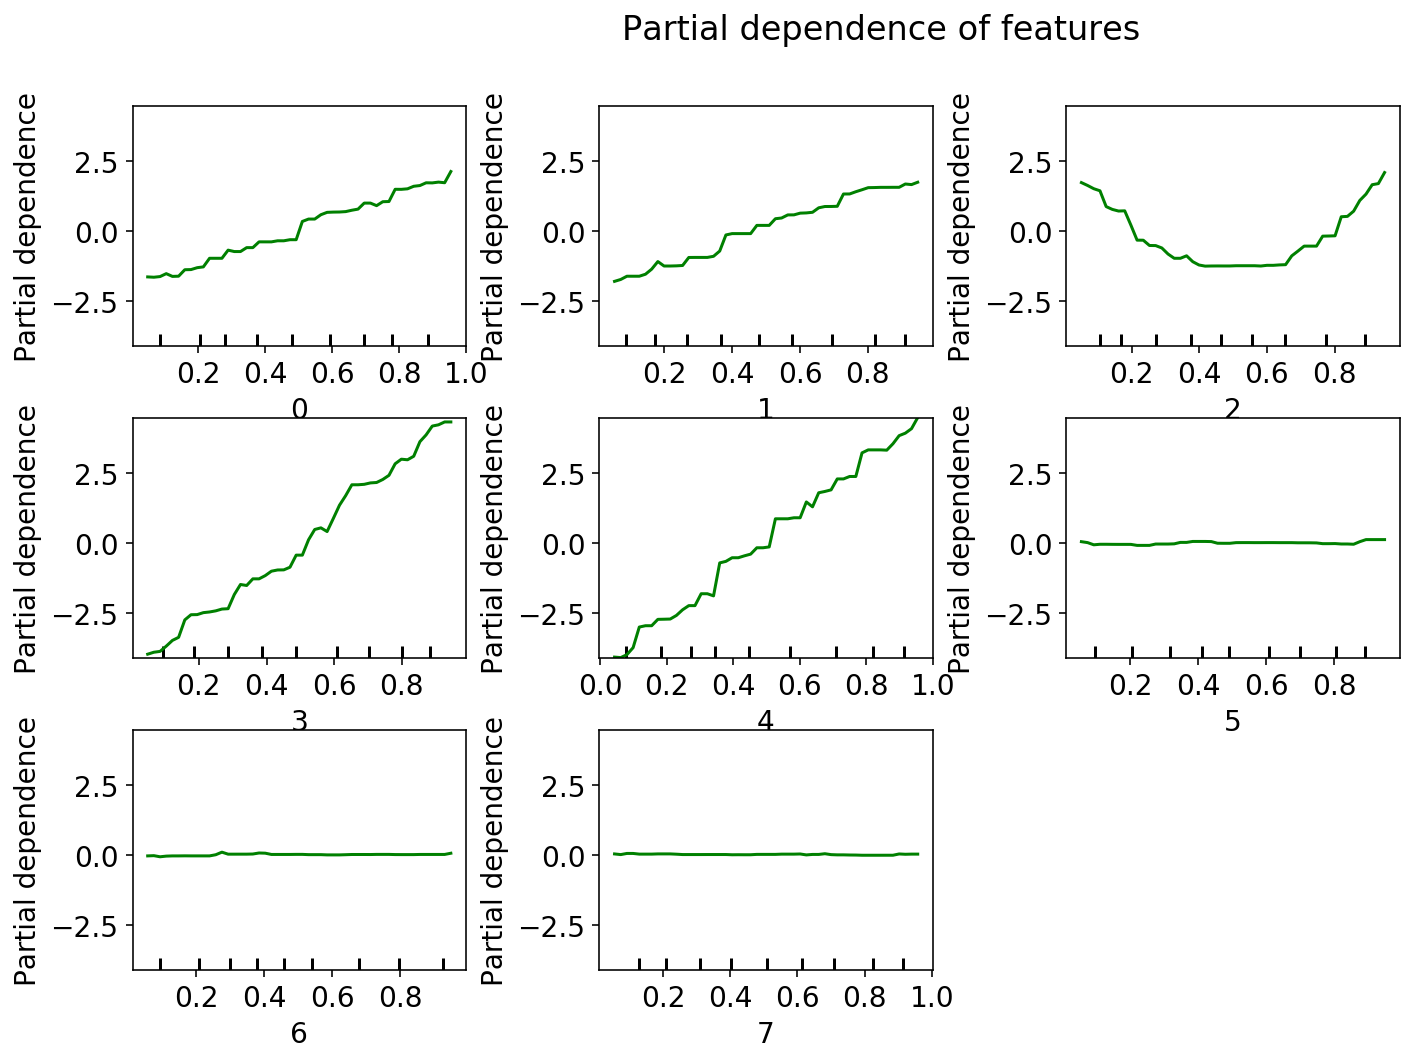

In [145]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

gbt = GradientBoostingRegressor(n_estimators=1000, learning_rate = 0.05, max_depth = 2)
gbt.fit (X_train, y_train)

features = [0, 1, 2, 3, 4, 5, 6, 7]
fig, axs = plot_partial_dependence(gbt, X_train, features,
                                    n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of features')
plt.subplots_adjust(top=0.9, left = -0.15)  # tight_layout causes overlap with suptitle
    
fig = plt.figure()

The uninformative features are 5, 6, and 7 because there is no partial dependance to those features.

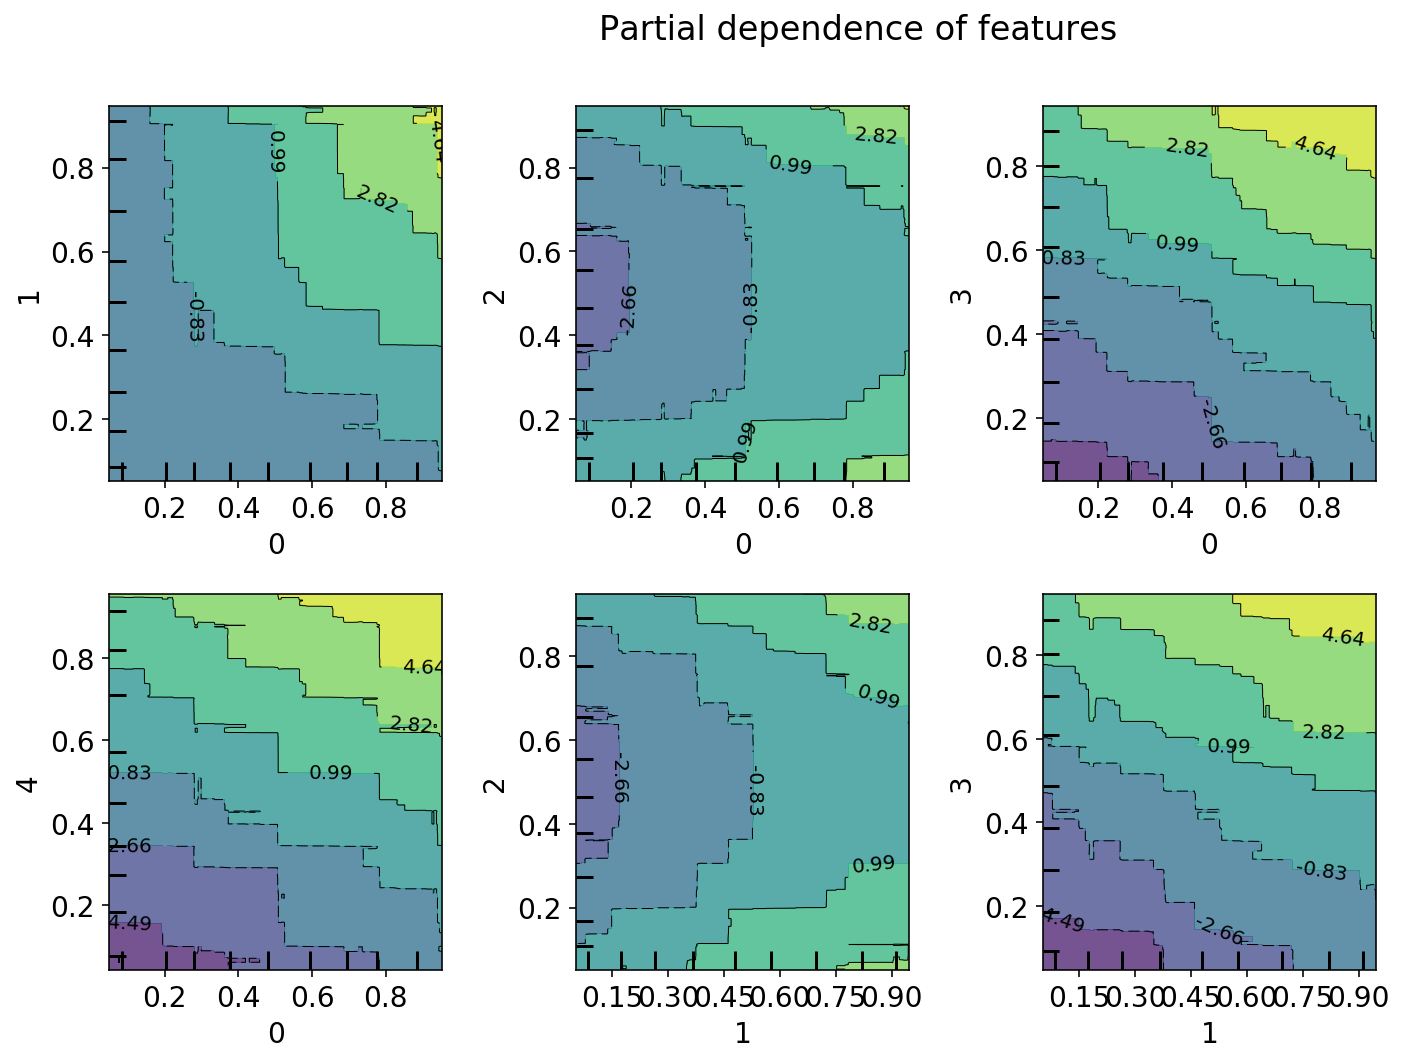

In [149]:
features = [(0,1), (0,2), (0,3), (0,4), (1,2), (1,3)]
fig, axs = plot_partial_dependence(gbt, X_train, features,
                                    n_jobs=3, grid_resolution=300)
fig.suptitle('Partial dependence of features')
plt.subplots_adjust(top=0.9, left = -0.15)  # tight_layout causes overlap with suptitle
    
fig = plt.figure()

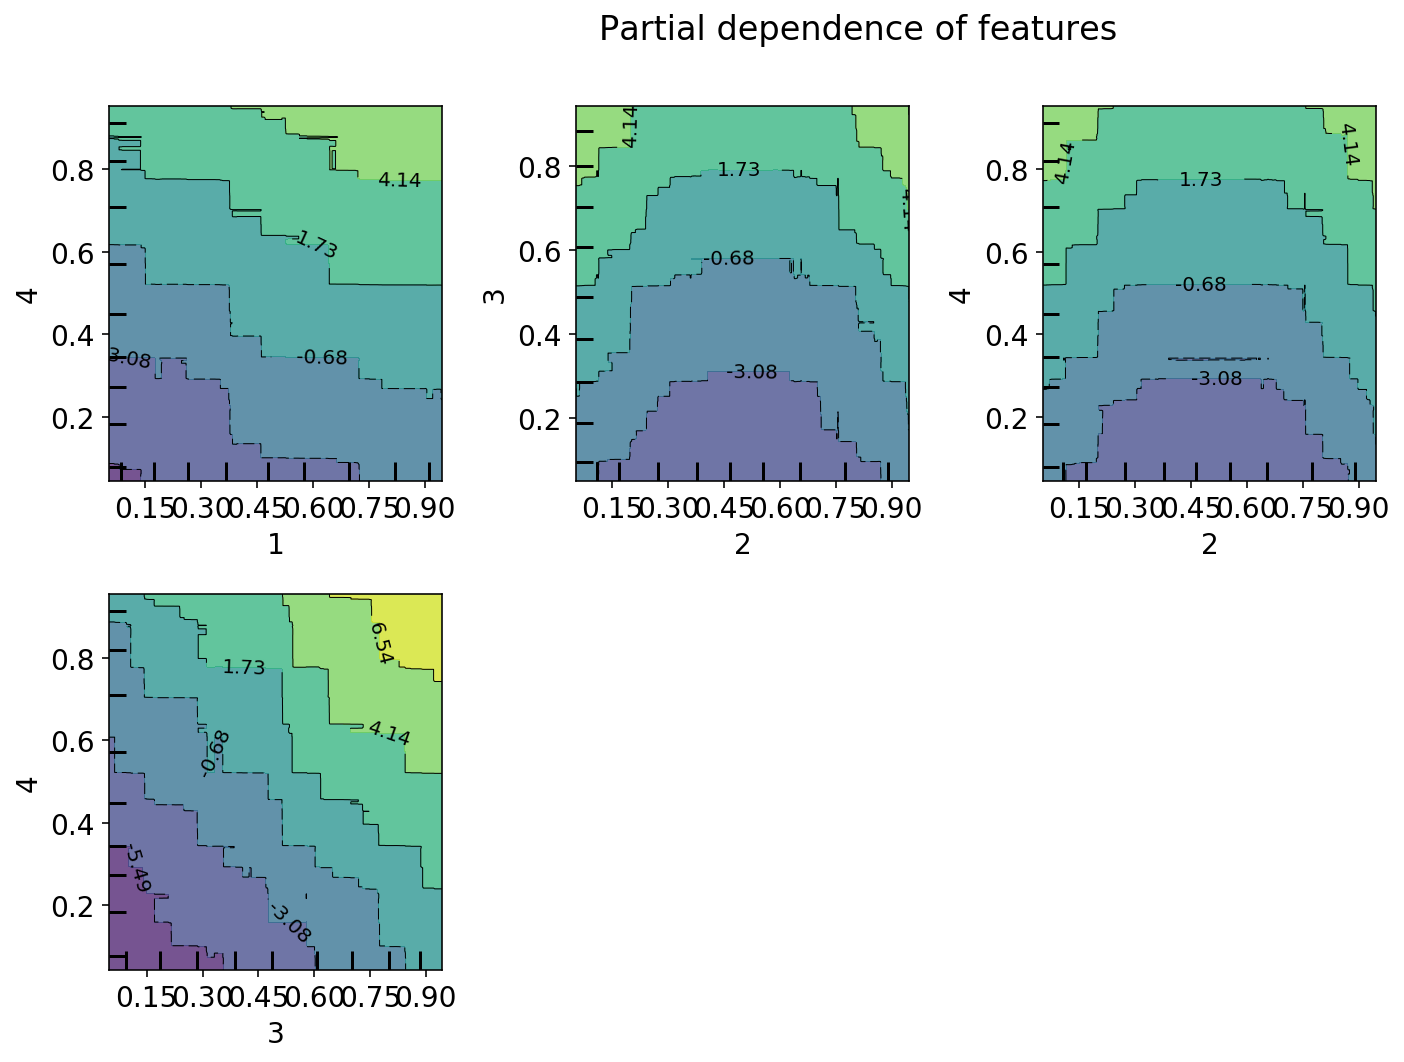

In [150]:
features = [(1,4), (2,3), (2,4), (3,4)]
fig, axs = plot_partial_dependence(gbt, X_train, features,
                                    n_jobs=3, grid_resolution=300)
fig.suptitle('Partial dependence of features')
plt.subplots_adjust(top=0.9, left = -0.15)  # tight_layout causes overlap with suptitle
    
fig = plt.figure()

The interaction between the features appears clearly in the 2D plots in color scale. The plot of feature 1 vs feature 2 shows an hyperbolic beahviour while the plots of feature 2 vs any of the other features has a parabolic behaviour. Features 3 and 4 are exactly anti-correlated. The dependance between all the other variables is linear.